In [2]:
import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Bigram model using neural networks

Single imput neural netwrok

Output = proability of next character (for each possible character)

We can then assess fit using the nll

Can use this to train a network - will be limited by the single input but it is an interesting start

In [3]:
#read names.txt file as a massive string and then split it up by line into a big list of strings
words = open("makemore/names.txt", "r").read().splitlines()

In [4]:
#old helper models

chars = ["."] + sorted(list(set("".join(words)))) 

#s to i lookup table (dictionary)
stoi = {s:i for i,s in enumerate(chars)}

itos = {i:s for s,i in stoi.items()}



# step 1: create the training set

In [5]:

# creating a training set of bigrams
xs, ys = [], []

for w in words[:1]:
    #go through each word

    #adding a start and end character
    chs = ["."] + list(w) + ["."]

    #extract all bigrams from within that word
    #nice iterator version - zip works to shortest list
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)         

#convert to tensors

#.tensor() infers dtype
#.Tensor() infers float32
xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs

tensor([ 0,  5, 13, 13,  1])

How do we plug this into the neural net

You cant just plug in an integer index??? as this would activate the neuron artificially - kind of makes sense (z would activate a lot - while a only a litte)

OHE bitch :)



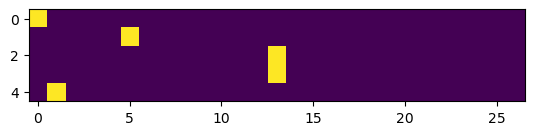

In [6]:
#takes a LongTensor with index values of shape * and return a tensor of shape *,num_classes that have 0s everywhere except where the index of last dimension amtches hte corresponidng value of hte tensor input

import torch.nn.functional as F

#Long = 64 bit integer (standard is 32)
xenc = F.one_hot(xs, num_classes= 27).float()
#want to convert to floating point numbers before we feed into network
#one_hot doesnt take a dtype argument so need to cast to float

plt.imshow(xenc)



# construct out first neuron

neuron = w @ x + b

In [7]:
#initialize weights
W = torch.randn((27,1)) #fills tensor with random numbers drawn from a normal distribution
W #column vector of 27 numbers

xenc @ W #matrix multiplication operator 

#?pytorch does this in parrallel


tensor([[ 1.2487],
        [ 0.6155],
        [ 0.3999],
        [ 0.3999],
        [-1.3477]])

# Cosntructing first layer


In [8]:
g = torch.Generator().manual_seed(2147483647+1)

#initialize weights
W = torch.randn((27,27), generator = g,requires_grad = True) #fills tensor with random numbers drawn from a normal distribution
#number of rows = determined by input - needs to match number of columns
#numebr of columns = number of neurons in this layer
W #column vector of 27 numbers

xenc @ W #rows correspond to each input, columns to each neuron

#?pytorch does this in parrallel


#e.g. [3,13] = firing rate of 13th neuron on 3rd input achieved by dot product of 3rd row of input matrix and 13th column of first layer matrix

#sanity checl
print((xenc @ W)[3,13])
print((xenc[3,:] * W[:,13]).sum())

tensor(0.4854, grad_fn=<SelectBackward0>)
tensor(0.4854, grad_fn=<SumBackward0>)


# Matrix multiplication
Matrix multiplication is Row * Column

a,b @ b,c => a,c

makes sense as each row a is an array of size b (columns) which is hten dot producted with each column in matrix 2 which is an array of 27 rows
The dot procudt will multiply and add each of these operations

MAKES SENSE

Will leave this as the whole NN

just 1 linear layer

No bias, no activation, no extra layers

The dumbest possible neural net

Still need a way of interpreting the neural network outputs

ideally like the way of normalizing counts to give probabilities

## WE CAN **SOFTMAX**

?same as interpreting the scores as being **"log counts"** or **"logits"**

so when we exponentiate it it becomes equivalent to out N array rows


In [10]:
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims =  True)
probs

#each row can be interpreted as probability distribution

tensor([[0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
         0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
         0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310],
        [0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
         0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
         0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205],
        [0.0973, 0.0235, 0.2014, 0.0240, 0.0510, 0.0341, 0.0644, 0.0075, 0.0197,
         0.0502, 0.0316, 0.0015, 0.0192, 0.0321, 0.0127, 0.0035, 0.0148, 0.0052,
         0.0262, 0.0415, 0.0086, 0.0445, 0.0277, 0.0252, 0.1034, 0.0042, 0.0250],
        [0.0973, 0.0235, 0.2014, 0.0240, 0.0510, 0.0341, 0.0644, 0.0075, 0.0197,
         0.0502, 0.0316, 0.0015, 0.0192, 0.0321, 0.0127, 0.0035, 0.0148, 0.0052,
         0.0262, 0.0415, 0.0086, 0.0445, 0.0277, 0.0252, 0.1034, 0.0042, 0.0250],
        [0.0737, 0.0209,

In [11]:
nlls = torch.zeros(5)
for i in range(5):
    #i-th bigram
    x = xs[i].item()
    y = ys[i].item()

    print("-----------")
    print("input into the neural net:",x)
    print('output probabilities from hte neural net:',probs[i])
    print("label (actual next character)",y)

    p = probs[i, y]

    print("prob assigned to net character:", p.item())

    logp = torch.log(p)
    print('logl',logp.item())

    nll = -logp
    print("nll:",nll)   
    nlls[i] = nll

#average negative log likelihood
print("average nll (loss):",nlls.mean().item())

-----------
input into the neural net: 0
output probabilities from hte neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310],
       grad_fn=<SelectBackward0>)
label (actual next character) 5
prob assigned to net character: 0.05734505504369736
logl -2.858668565750122
nll: tensor(2.8587, grad_fn=<NegBackward0>)
-----------
input into the neural net: 5
output probabilities from hte neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205],
       grad_fn=<SelectBackward0>)
label (actual next character) 13
prob assigned to net character: 0.01458862517029047
logl -4.227513313293457
nll: tensor(4.2275, gra

# **Training the network !!!!**

## optimizing W

Each of these steps can be differentiated across


So to train network we want to optimize W (a 27 x 27 matrix) such that the probabilities coming out are pretty good

Measure pretty good using our loss function ... 


### **Will look very simliar to micrograd**

# **1. Forward pass**

In [12]:
#forward pass 
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims =  True)
#probs #probs = ypred

#evaluate logg - use nll (common for classification while MSE is more common for regression)
#to pluck out corresponding prbabilities can use 
# Negative log likelihood
loss = -probs[np.arange(len(ys)),ys].log().mean()
loss


tensor(3.3771, grad_fn=<NegBackward0>)

# **2. Backward pass**

In [13]:
#backward pass
#1. Reset gradients - setting it to None is more efficient
W.grad = None 
#2. computing gradients
loss.backward()

# 3. Optimize/update weights

Pytorch keeps track of all of the operations under the hood

In [14]:
#update weights
learning_rate = 0.1
W.data += -learning_rate * W.grad

## Indexing test


In [15]:
#indexing test
print(probs.shape)
print(ys)
print(probs[0,5],probs[1,13],probs[2,13],probs[3,1],probs[4,0])
#print(F.one_hot(ys,num_classes = 27).T)
#print((probs @ F.one_hot(ys,num_classes = 27).float().T)) 

#better to just apply the mask over (element size multiplication and then sum rows)
#print( (probs * F.one_hot(ys,num_classes = 27).float() ).sum(dim = 1)) #.sum(dim = 1, keepdim = False)

#karpathys way
torch.arange(5)
print(f"{probs[torch.arange(5),ys]=}")
#but 
print(f"{probs[1:5,ys]=}")

torch.Size([5, 27])
tensor([ 5, 13, 13,  1,  0])
tensor(0.0573, grad_fn=<SelectBackward0>) tensor(0.0146, grad_fn=<SelectBackward0>) tensor(0.0321, grad_fn=<SelectBackward0>) tensor(0.0235, grad_fn=<SelectBackward0>) tensor(0.0737, grad_fn=<SelectBackward0>)
probs[torch.arange(5),ys]=tensor([0.0573, 0.0146, 0.0321, 0.0235, 0.0737], grad_fn=<IndexBackward0>)
probs[1:5,ys]=tensor([[0.0580, 0.0146, 0.0146, 0.0113, 0.0426],
        [0.0341, 0.0321, 0.0321, 0.0235, 0.0973],
        [0.0341, 0.0321, 0.0321, 0.0235, 0.0973],
        [0.0142, 0.0118, 0.0118, 0.0209, 0.0737]], grad_fn=<IndexBackward0>)


# **everything cleaned up**


helper functions at top

In [16]:
xs, ys = [],[]
for word in words:
    word = "." + word + "."
    for ch1, ch2 in zip(word,word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

#initialize network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

In [17]:
#gradient descent
epochs = 100
for i in range(epochs):
    #forward pass
    xenc = F.one_hot(xs,num_classes = 27).float() #n,27   and W: 27 * 27
    logits = xenc @ W #predict log counts
    counts = logits.exp()
    probs = counts / counts.sum(dim = 1, keepdim = True) #broadcasting super important here, keep dim keeps it a colum vector
    loss = -probs[np.arange(len(ys)),ys].log().mean()
    print(loss.item())

    #bacwkard pass
    W.grad = None
    loss.backward()

    #optimize
    learning_rate = 50
    W.data += -learning_rate*W.grad



3.758953809738159
3.3710803985595703
3.1540329456329346
3.0203664302825928
2.9277069568634033
2.8604001998901367
2.809727430343628
2.7701010704040527
2.738072633743286
2.711496114730835
2.6890032291412354
2.6696887016296387
2.6529300212860107
2.638277053833008
2.6253879070281982
2.613990545272827
2.60386323928833
2.5948219299316406
2.586712121963501
2.57940411567688
2.572789192199707
2.5667765140533447
2.5612881183624268
2.5562589168548584
2.551633834838867
2.547366142272949
2.5434155464172363
2.5397486686706543
2.536336660385132
2.5331544876098633
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086872577667236
2.5071346759796143
2.5056614875793457
2.504261016845703
2.502929210662842
2.5016613006591797
2.5004522800445557
2.4992990493774414
2.498197317123413
2.497144937515259
2.496137857437134
2.495173692703247
2.4942495822906494
2.493363380432129
2.

# What number do we expect from the loss

Actaully what we had with the original bigram model

As that was mathematically the perfect way of doing this - model and model evaluation were the same thing

Neural network has no additional information

But gradient based approach is more flexible so we can use more information now....

We will now start feeding more info into more and more complicated neural nets 

But hte outputs will alwasy be interpreted as logits essentially have hte same operations done on them


Bigram cant be extended due to combinatorial explosion

# Some notes

OHE essentially just selects a certain input neuron which is just an array of weights - and the highest of these weights will be selected

W = 27 x 27

So is literally just like hte bigram table - equivalent

But W is technically interpreted as the LOGITS so W.exp() ~ bigram table

Almost the same ?they might appraoch each other with training - 
IT IS ALMOST IDENTICAL AFTER TRAINING



# Laplace regularization

adding "fake" counts into the bigram table

as you add counts the probability dist comes more and more uniform

Gradient based equivalent to smoothing

hmmmmmm


when W are all 0 - the probs come out uniform

So incentivizing W to be near zero this is conceptually equivalent to label smoothing

More inenticized this is in hte loss function - the more smooth this will be

How do we do this....


# ADD A REGULARIZATIAON LOSS

e.g. $ L2 = W^2 $

## **TOTAL_LOSS = DATA_LOSS + REG_LOSS **

makes sense

network is trying to balance the 2 - wowowow

# sampling from this neural netowrk

In [21]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:
        #before
        #p = P[ix]

        #now with NN

        xenc = F.one_hot(torch.tensor([ix]),num_classes = 27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(dim = 1, keepdims = True)

        ix = torch.multinomial(p, num_samples=  1,replacement= True, generator= g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))
    

junide.
janasah.
p.
cfay.
a.



## **Misc information:**
https://web.stanford.edu/~jurafsky/slp3/3.pdf

# Exercises


## **E01: trigram model**

In [136]:
xs, ys = [],[]
for word in words[:1]:
    word = ".." + word + ".."
    for (ch1,ch2), ch3 in zip(zip(word,word[1:]), word[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

xs

tensor([[ 0,  0],
        [ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1],
        [ 1,  0]])

In [139]:
#one hot encoding
xenc = F.one_hot(xs,num_classes= 27)
print(xs.shape)
print(xenc.shape)

# reshape inputs into a matrix of n rows and 27*2 columns - like stacking the OHE vectors onto each other
xenc_ = xenc.reshape(xenc.shape[0],-1)

# #
# out_tensor = torch.zeros((4,54))
# for i,matrix in enumerate(xenc):
#     output_mat = torch.cat((matrix[0], matrix[1]),dim = 0)
#     out_tensor[i] = output_mat
    
# fig = plt.figure()
# ax1 = fig.add_subplot(211)
# ax1.imshow(xenc_)
# ax2 = fig.add_subplot(212)
# ax2.imshow(out_tensor)

torch.Size([6, 2])
torch.Size([6, 2, 27])


In [143]:
#initialize network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54,27), generator = g, requires_grad = True)

In [144]:
#gradient descent
epochs = 100
for i in range(epochs):
    #forward pass
    xenc = F.one_hot(xs,num_classes = 27).float() #n,27   and W: 54 * 27
    x_input = xenc.reshape(xenc.shape[0],-1)
    logits = x_input @ W #predict log counts
    counts = logits.exp()
    probs = counts / counts.sum(dim = 1, keepdim = True) #broadcasting super important here, keep dim keeps it a colum vector
    loss = -probs[np.arange(len(ys)),ys].log().mean()
    print(loss.item())

    #bacwkard pass
    W.grad = None
    loss.backward()

    #optimize
    learning_rate = 1
    W.data += -learning_rate*W.grad

4.316141128540039
3.961319923400879
3.618088722229004
3.288017511367798
2.9728591442108154
2.674419641494751
2.3943991661071777
2.134226083755493
1.8949337005615234
1.6770890951156616
1.480785846710205
1.3056743144989014
1.1510084867477417
1.0156900882720947
0.898322343826294
0.7972742915153503
0.7107650637626648
0.6369583010673523
0.5740584135055542
0.5203924179077148
0.47446492314338684
0.4349842071533203
0.400861531496048
0.3711954355239868
0.34524670243263245
0.3224129378795624
0.3022027313709259
0.2842157185077667
0.26812341809272766
0.2536559998989105
0.2405896782875061
0.2287389487028122
0.21794778108596802
0.20808535814285278
0.19904069602489471
0.1907193660736084
0.18304049968719482
0.17593465745449066
0.16934175789356232
0.16320963203907013
0.15749286115169525
0.15215159952640533
0.14715109765529633
0.14246021211147308
0.1380518525838852
0.13390161097049713
0.12998813390731812
0.12629206478595734
0.12279597669839859
0.11948464065790176
0.11634368449449539
0.11336076259613037


# E02: train test split

In [235]:
xs, ys = [],[]
for word in words[:]:
    word = ".." + word + ".."
    for (ch1,ch2), ch3 in zip(zip(word,word[1:]), word[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1,ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [236]:
#reshape data
xenc = F.one_hot(xs,num_classes = 27).float() #n,27   and W: 54 * 27
x_input = xenc.reshape(xenc.shape[0],-1)

In [237]:
# train test split
inds= torch.arange(xs.shape[0])
print(len(inds))

#hacky solution before I fully GROK datasets
# seems like datasets are generators so can use 
# list comprehension 
# dont grok but can work okay for now
train_dev, test = torch.utils.data.random_split(inds,
                                            [int(np.floor(len(inds)*0.9)),
                                             int(np.ceil(len(inds)*0.1))])
train, dev = torch.utils.data.random_split(train_dev,
                                            [int(np.floor(len(train_dev)*0.9)),
                                             int(np.ceil(len(train_dev)*0.1))])

train_ind = torch.tensor([i for i in train])
dev_ind = torch.tensor([i for i in dev])
test_ind = torch.tensor([i for i in test])

x_train, x_dev, x_test = x_input[train_ind], x_input[dev_ind], x_input[test_ind]
y_train, y_dev, y_test = ys[train_ind], ys[dev_ind], ys[test_ind]

260179


In [242]:
#initialize network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54,27), generator = g, requires_grad = True)

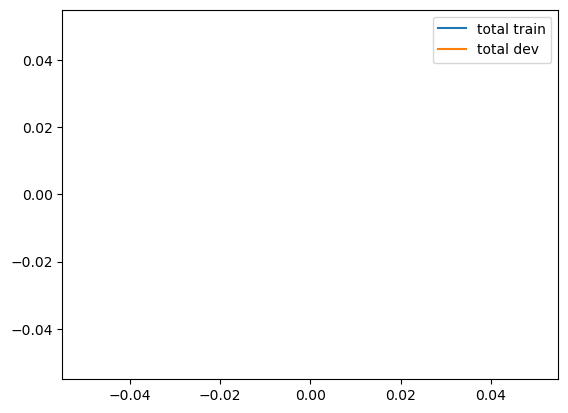

In [256]:
def forward(X,y,weights,reg_lambda = 0.01):
    #helper function for forward pass
    #returns losses
    #forward pass
    logits = X @ weights #predict log counts
    counts = logits.exp()
    probs = counts / counts.sum(dim = 1, keepdim = True) #broadcasting super important here, keep dim keeps it a colum vector
    data_loss = -probs[np.arange(len(y)),y].log().mean()

    #regularization_loss (L2)
    reg_loss = reg_lambda * (W**2).mean()

    #total_loss
    total_loss = data_loss + reg_loss

    return total_loss, data_loss, reg_loss


#gradient descent
epochs = 200
total_train_losses = torch.zeros((epochs,1))
data_train_losses = torch.zeros((epochs,1))
reg_train_losses = torch.zeros((epochs,1))
total_dev_losses = torch.zeros((epochs,1))
for i in range(epochs):
    #forward pass train
    total_train_loss, data_train_loss, reg_train_loss = \
    forward(x_train,y_train,W,reg_lambda = 0.0001)
    
    #forward pass dev
    total_dev_loss, data_dev_loss, reg_dev_loss = \
    forward(x_dev,y_dev,W,reg_lambda = 0.0001)
    
    # #saving losses
    total_train_losses[i] = total_train_loss
    data_train_losses[i] = data_train_loss
    reg_train_losses[i] = reg_train_loss
    total_dev_losses[i] = total_dev_loss

    #bacwkard pass
    W.grad = None
    total_train_loss.backward()

    #optimize
    learning_rate = 10
    W.data += -learning_rate*W.grad

plt.plot(total_train_losses.detach(),label = "total train")
#plt.plot(data_train_losses.detach(), alpha = 0.8,label = "data train")
#plt.plot(reg_train_losses.detach(), alpha = 0.8, label = "reg train")
plt.plot(total_dev_losses.detach(), label = "total dev")
plt.legend(loc = "upper right")

# E03: find best regularization

In [257]:
# use data from above just initialize a new model
#initialize network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54,27), generator = g, requires_grad = True)




In [258]:
exponents = np.arange(-10,5)
lambdas = [10.0**e for e in exponents]
lambdas

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0,
 10.0,
 100.0,
 1000.0,
 10000.0]

In [259]:
dev_losses = []

for lam in lambdas:

    #gradient descent
    epochs = 200
    total_train_losses = torch.zeros((epochs,1))
    data_train_losses = torch.zeros((epochs,1))
    reg_train_losses = torch.zeros((epochs,1))
    total_dev_losses = torch.zeros((epochs,1))

    for i in range(epochs):
        #forward pass train
        total_train_loss, data_train_loss, reg_train_loss = \
        forward(x_train,y_train,W,reg_lambda = lam)
        
        #forward pass dev
        total_dev_loss, data_dev_loss, reg_dev_loss = \
        forward(x_dev,y_dev,W,reg_lambda = lam)
        
        # #saving losses
        total_train_losses[i] = total_train_loss
        data_train_losses[i] = data_train_loss
        reg_train_losses[i] = reg_train_loss
        total_dev_losses[i] = total_dev_loss

        #bacwkard pass
        W.grad = None
        total_train_loss.backward()

        #optimize
        learning_rate = 20
        W.data += -learning_rate*W.grad

    # plt.plot(total_train_losses.detach(),label = "total train")
    # plt.plot(data_train_losses.detach(), alpha = 0.8,label = "data train")
    # plt.plot(reg_train_losses.detach(), alpha = 0.8, label = "reg train")
    # plt.plot(total_dev_losses.detach(), label = "total dev")
    # plt.legend(loc = "upper right")

    dev_losses.append(data_dev_loss.item())

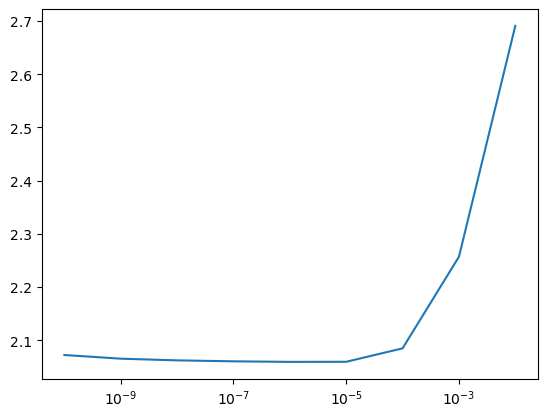

In [255]:
plt.plot(lambdas,dev_losses)
plt.xscale("log")

Model is too simple to overfit :)

# E04: jsut indexing -boring



# E05: F.cross_entropy

the cross entropy of hte distribution q relative tot eh distribution p over a given set is

$ H(p,q) = -Ep[log(q)] $

where Ep is hte expected value operator with respect to the distribution p

***Maths stuff***

the definition may be formulated using the kullback-leibler divergence


**** For discrede probability distributions p and q witht he same support X this means

$ H(P,Q) = - \sum p(x)logq(x)$



In [ ]:
# use data from above just initialize a new model
#initialize network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54,27), generator = g, requires_grad = True)




In [ ]:
def forward_cross_entropy(X,y,weights,reg_lambda = 0.01):
    #helper function for forward pass
    #returns losses
    #forward pass
    logits = X @ weights #predict log counts
    counts = logits.exp()
    probs = counts / counts.sum(dim = 1, keepdim = True) #broadcasting super important here, keep dim keeps it a colum vector
    data_loss = -probs[np.arange(len(y)),y].log().mean()

    #regularization_loss (L2)
    reg_loss = reg_lambda * (W**2).sum()

    #total_loss
    total_loss = data_loss + reg_loss

    return total_loss, data_loss, reg_loss

dev_losses = []

for lam in lambdas:

    #gradient descent
    epochs = 200
    total_train_losses = torch.zeros((epochs,1))
    data_train_losses = torch.zeros((epochs,1))
    reg_train_losses = torch.zeros((epochs,1))
    total_dev_losses = torch.zeros((epochs,1))

    for i in range(epochs):
        #forward pass train
        total_train_loss, data_train_loss, reg_train_loss = \
        forward(x_train,y_train,W,reg_lambda = lam)
        
        #forward pass dev
        total_dev_loss, data_dev_loss, reg_dev_loss = \
        forward(x_dev,y_dev,W,reg_lambda = lam)
        
        # #saving losses
        total_train_losses[i] = total_train_loss
        data_train_losses[i] = data_train_loss
        reg_train_losses[i] = reg_train_loss
        total_dev_losses[i] = total_dev_loss

        #bacwkard pass
        W.grad = None
        total_train_loss.backward()

        #optimize
        learning_rate = 20
        W.data += -learning_rate*W.grad

    # plt.plot(total_train_losses.detach(),label = "total train")
    # plt.plot(data_train_losses.detach(), alpha = 0.8,label = "data train")
    # plt.plot(reg_train_losses.detach(), alpha = 0.8, label = "reg train")
    # plt.plot(total_dev_losses.detach(), label = "total dev")
    # plt.legend(loc = "upper right")

    dev_losses.append(data_dev_loss.item())